## <font color='tag:blue'>Projeto 2</font>

## <font color='tag:blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset (que já passou por uma pré-limpeza para este projeto)
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

Verificando a qualidade dos dados

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda 'Valor_Venda' que é a variável de interesse.
# O resumo estatístico se aplica para variáveis numéricas, mas não para categóricas.
# O Segundo quartil equivale à MEDIANA.
# Como a MEDIANA está bem diferente da média, pode-se de antemão já inferir que há outliers para cima nesse dataset.
# Este método é um bom indicador prévio de outliers.
# Esses outliers "empurram" a média para cima em comparação com a mediana (50% - segundo quartil).
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes (null)
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Conferindo quais as variáveis categóricas presentes no campo 'Categoria' e o número de ocorrências de cada uma:
df_dsa.Categoria.value_counts()

Office Supplies    5851
Furniture          2055
Technology         1794
Name: Categoria, dtype: int64

In [14]:
# Pode-se filtrar e ter um overview do volume vendido em cada "Categoria" de produto, dividido por 'Cidade':
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum()

Valor_Venda
Categoria  Cidade                 
Furniture  Akron          433.5960
           Alexandria     267.4600
           Allen          244.0060
           Allentown       11.6480
           Amarillo      3048.5828
...                            ...
Technology Wichita        224.7500
           Wilmington    1786.3760
           Woodland       239.9840
           Yonkers       6140.2200
           Yuma           785.5130

[1185 rows x 1 columns]

In [15]:
# Pode-se aplicar o método sort e obter a resposta, dentro do filtro, dessa primeira questão de negócio:
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum().sort_values\
    (by='Valor_Venda', ascending=False)

,,Valor_Venda
Categoria,Cidade,
Technology,New York City,108890.166
Furniture,New York City,74496.239
Technology,Los Angeles,72109.912
Office Supplies,New York City,68362.814
Furniture,Los Angeles,52446.621
...,...,...
Office Supplies,Jupiter,2.064
Technology,Sheboygan,1.980
Office Supplies,Elyria,1.824


> Ou seja, a resposta desta primeira pergunta de negócio é New York City, com o Valor_Venda de 68362.814.

Mas pode-se fazer de uma forma mais clara e visualmente mais atrativa para apresentar para um cliente, por exemplo.

In [16]:
# Como o objetivo é indicar a cidade com o maior 'Valor_Venda' da 'Categoria' 'Office Supplies', pode-se 
# coletar apenas as ocorrências nessa Categoria e salvar em uma variável.
df_agrupado = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
df_agrupado.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [17]:
# Em seguida, agrupam-se os resultados por cidade, somando a coluna 'Valor_Venda' de cada 'Cidade'.
# E já retorna como um dataframe para permitir uma melhor manipulação.
df_vendas = df_agrupado.groupby('Cidade')['Valor_Venda'].sum().to_frame()

In [18]:
# Por último, pode-se retornar o DataFrame anterior, ordenando a partir do maior valor...
df_vendas.sort_values(by='Valor_Venda', ascending=False)

,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [19]:
# E isolando somente o primeiro registro (a linha de interesse):
df_vendas.sort_values(by='Valor_Venda', ascending=False).head(1)

,Valor_Venda
Cidade,
New York City,68362.814


In [20]:
# Pode-se ainda gerar o resultado neste formato:
df_cidade = df_vendas.sort_values(by='Valor_Venda', ascending=False)
df_cidade.iloc[0]

Valor_Venda    68362.814
Name: New York City, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

(Demonstrando o resultado através de um gráfico de barras)

In [21]:
# Para permitir a manipulação correta das datas, é necessário ajustar o tipo dos dados na coluna 'Data_Pedido'
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y')

In [22]:
# Cria-se uma pd.Series com o "Valor_Venda" por data e transformando em DataFrame (para facilitar a manipulação)
df_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().to_frame()
df_data.sort_values(by='Data_Pedido')

,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


<Axes: xlabel='Data_Pedido'>

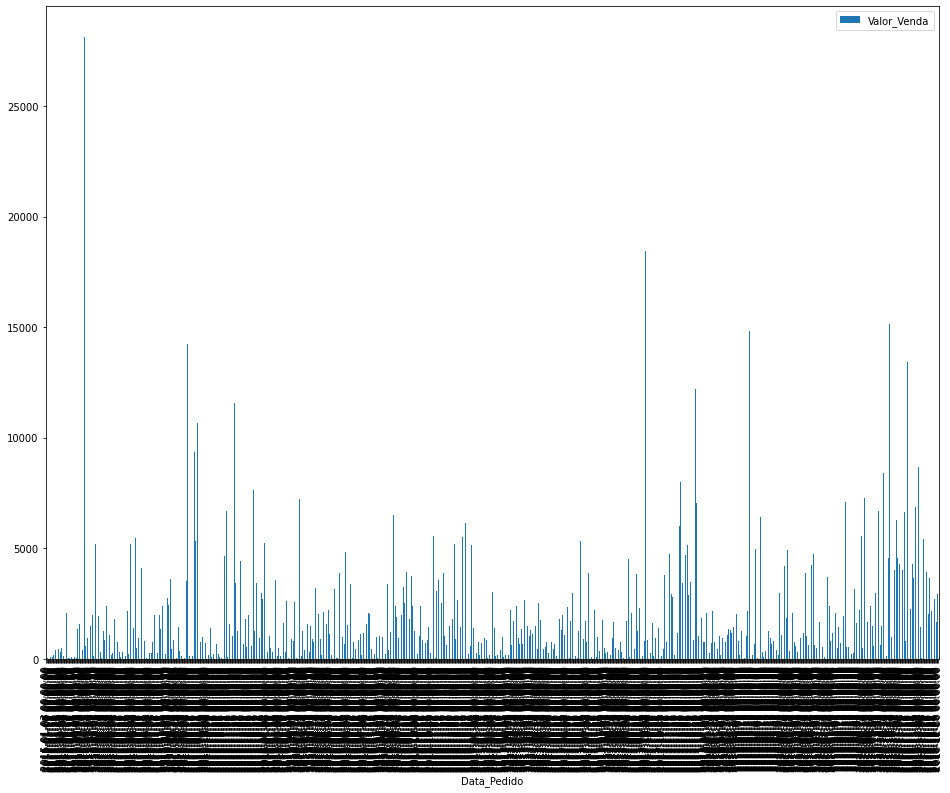

In [23]:
# Se fosse plotado um único gráfico simples a partir dessa Series, ele ficaria muito poluido devido à alta... 
# ...granularidade dos dados, conforme exemplos abaixo:
df_data.plot.bar(figsize=(16,12))

Como a série história compreende 4 anos de dados, com granularidade diária, tem-se algumas alternativas mais vantajosas:

> Classificar os dados por períodos maiores, de forma a permitir uma visualização mais adequada. Pode-se agrupar (acumular) os dados por ano, por semestre, ou por mês, por exemplo, gerando um único gráfico com todos os valores.

> Pode-se ainda gerar um gráfico para cada mês da série histórica, compreendendo assim o 'Valor_Venda' para cada data individualmente.

In [24]:
# Criando um DataFrame com os resultados anuais de vendas:
df_year = df_data.resample('Y').sum()
df_year

,Valor_Venda
Data_Pedido,
2015-12-31,470768.6001
2016-12-31,454072.5154
2017-12-31,595365.9240
2018-12-31,715350.9152


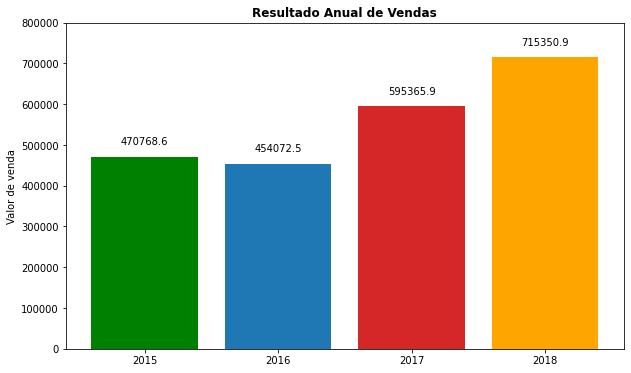

In [25]:
# Plotando um gráfico com o acumulado anual de vendas usando o matplotlib.pyplot.subplots:

fig, ax = plt.subplots(figsize=(10,6))

years = ["2015", "2016", "2017", "2018"]
sells = df_year['Valor_Venda']
bar_colors = ['green', 'tab:blue', 'tab:red', 'orange']

bars = ax.bar(years, sells, color=bar_colors)

# Adicionando rótulo das barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 10),  # offset do texto sobre a barra
                textcoords="offset points", ha='center', va='bottom')


ax.set_ylabel('Valor de venda')
ax.set_title('Resultado Anual de Vendas', fontweight='bold')
ax.set_ylim(0, 800000)

plt.show()

In [26]:
# Pode-se fazer representar os dados em outra frequência, criando o Dataframe com os dados trimestrais, p. exemplo
df_quarter = df_data.resample('Q').sum()
df_quarter

,Valor_Venda
Data_Pedido,
2015-03-31,73370.8460
2015-06-30,84977.1536
2015-09-30,137630.7423
2015-12-31,174789.8582
2016-03-31,62075.3710
2016-06-30,87049.3230
2016-09-30,128560.2072
2016-12-31,176387.6142
2017-03-31,92109.7690


In [27]:
# TEMPORÁRIO. Talvez eliminar
# df_quarter['Valor_Venda'][2:16:4]

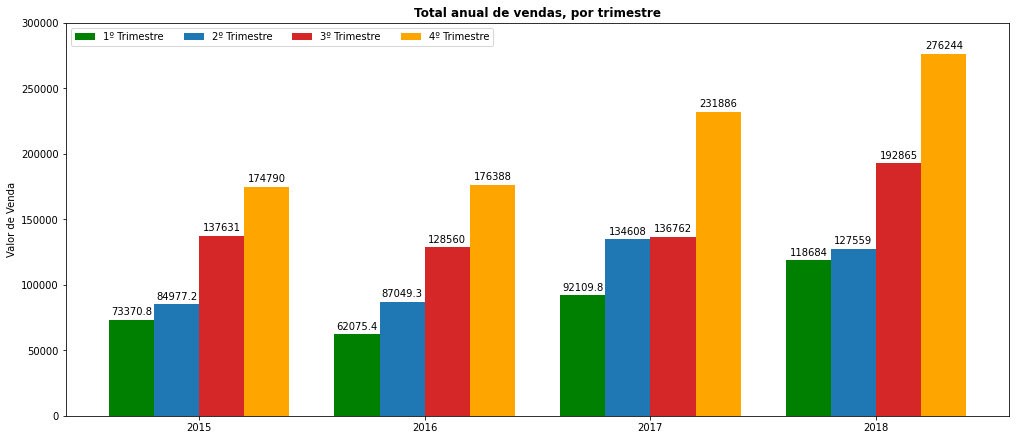

In [28]:
# Plotando gráfico de barras com o volume de vendas por trimestre, agrupados anualmente:
years = ("2015", "2016", "2017", "2018")
trimestrais = {
    '1º Trimestre': (df_quarter['Valor_Venda'][0:16:4]),
    '2º Trimestre': (df_quarter['Valor_Venda'][1:16:4]),
    '3º Trimestre': (df_quarter['Valor_Venda'][2:16:4]),
    '4º Trimestre': (df_quarter['Valor_Venda'][3:16:4]),
}

# Ajuste das barras
x = np.arange(len(years))  # Posição dos rótulos
width = 0.2  # Espessura das barras
multiplier = 0

# Ajuste do layout
fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for attribute, measurement in trimestrais.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Ajuste dos eixos
ax.set_ylabel('Valor de Venda')
ax.set_title('Total anual de vendas, por trimestre', fontweight='bold')
ax.set_xticks(x + (width*1.5), years) # Alinhamento
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300000)

plt.show()

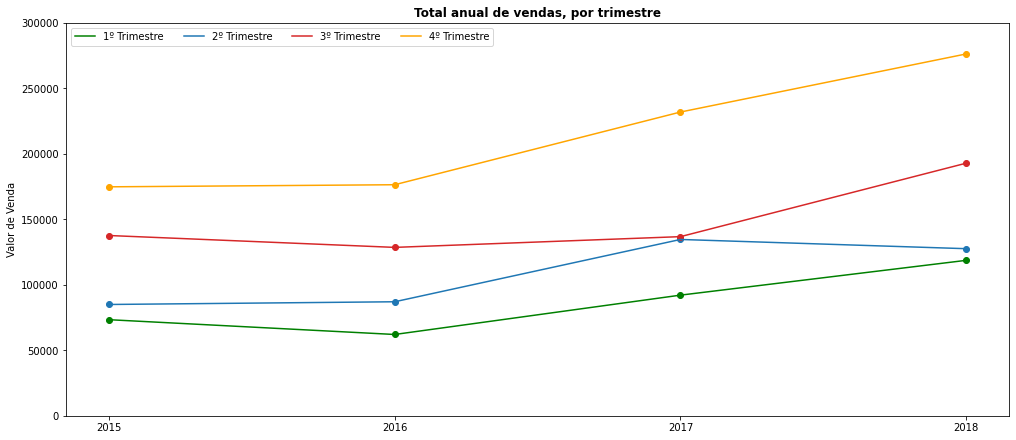

In [29]:
# Pode-se plotar ainda as vendas trimestrais com linhas, comparando cada período a seu correspondente, por ano.
# enfatizando ainda que as vendas aumentam com o decorrer do ano, com o maior volume de venda nos trimestres finais.

x = np.arange(len(years))  # the label locations
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for attribute, measurement in trimestrais.items():
    ax.plot(x, measurement, label=attribute, color=bar_colors[multiplier])
    ax.scatter(x, measurement, color=bar_colors[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor de Venda')
ax.set_title('Total anual de vendas, por trimestre', fontweight='bold')
ax.set_xticks(x, years)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300000)

plt.show()

In [30]:
# Pode-se agrupar o Valor de Venda por Mês:
df_monthly = df_data.resample('M').sum()
df_monthly

,Valor_Venda
Data_Pedido,
2015-01-31,14205.7070
2015-02-28,3959.3420
2015-03-31,55205.7970
2015-04-30,27336.6230
2015-05-31,23457.3950
2015-06-30,34183.1356
2015-07-31,31124.8270
2015-08-31,25700.1865
2015-09-30,80805.7288


Text(0.5, 1.0, 'Vendas Mensais - 2018')

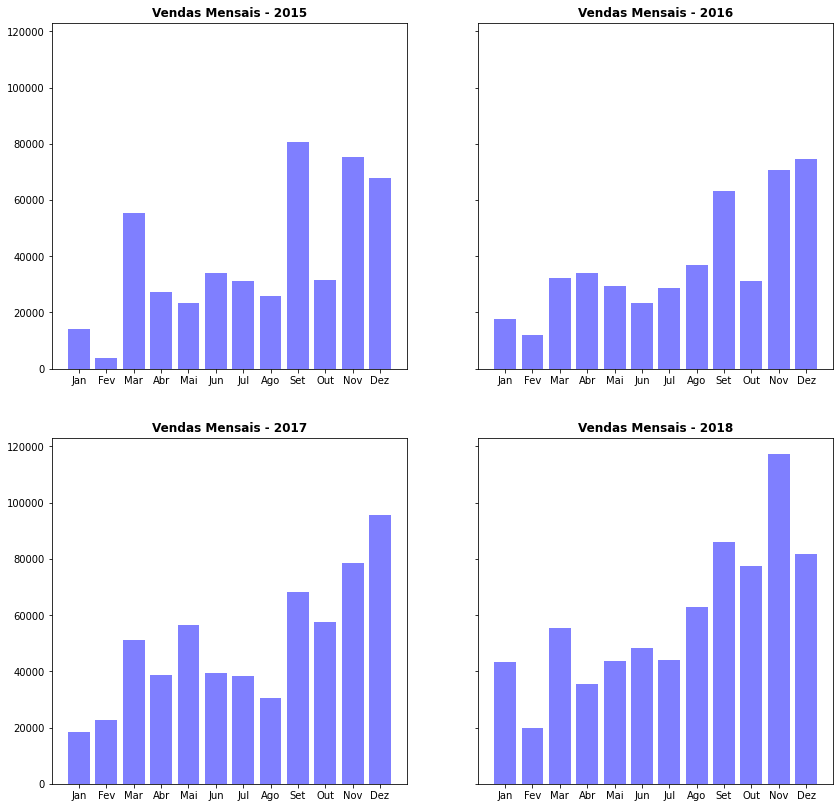

In [31]:
# Plotando o resultado mensal de vendas, agrupando em subplots minimalistas, um para cada ano.
months = np.array(["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
dict_sells_per_year = {
    '2015': (df_monthly['Valor_Venda'][0:12]),
    '2016': (df_monthly['Valor_Venda'][12:24]),
    '2017': (df_monthly['Valor_Venda'][24:36]),
    '2018': (df_monthly['Valor_Venda'][36:48]),
}
sells_per_year = np.array(list(dict_sells_per_year.values()))

fig, axes = plt.subplots(2, 2, figsize = (14, 14), sharey=True)

axes[0,0].bar(months, sells_per_year[0], align="center", width=0.8, alpha=0.5, color='blue')
axes[0,0].set_title("Vendas Mensais - 2015", fontweight='bold')

axes[0,1].bar(months, sells_per_year[1], align="center", width=0.8, alpha=0.5, color='blue')
axes[0,1].set_title("Vendas Mensais - 2016", fontweight='bold')

axes[1,0].bar(months, sells_per_year[2], align="center", width=0.8, alpha=0.5, color='blue')
axes[1,0].set_title("Vendas Mensais - 2017", fontweight='bold')

axes[1,1].bar(months, sells_per_year[3], align="center", width=0.8, alpha=0.5, color='blue')
axes[1,1].set_title("Vendas Mensais - 2018", fontweight='bold')

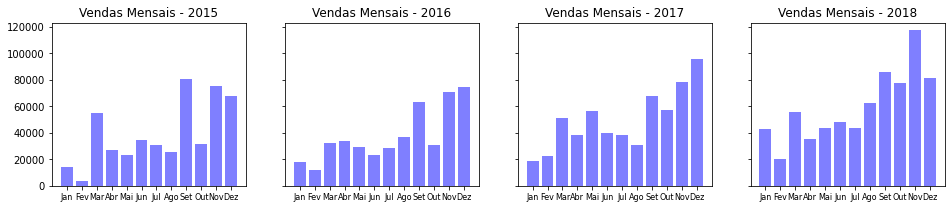

In [32]:
# Ajustar legendas eixo X
fig, axes = plt.subplots(1, 4, figsize = (16, 3), sharey=True)

axes[0].bar(months, sells_per_year[0], align="center", width=0.8, alpha=0.5, color='blue')
axes[0].set_title("Vendas Mensais - 2015")
axes[0].tick_params(axis='x', labelsize=8) 

axes[1].bar(months, sells_per_year[1], align="center", width=0.8, alpha=0.5, color='blue')
axes[1].set_title("Vendas Mensais - 2016")
axes[1].tick_params(axis='x', labelsize=8)

axes[2].bar(months, sells_per_year[2], align="center", width=0.8, alpha=0.5, color='blue')
axes[2].set_title("Vendas Mensais - 2017")
axes[2].tick_params(axis='x', labelsize=8)

axes[3].bar(months, sells_per_year[3], align="center", width=0.8, alpha=0.5, color='blue')
axes[3].set_title("Vendas Mensais - 2018")
axes[3].tick_params(axis='x', labelsize=8)

Pode-se usar uma plotagem semelhante para plotar o resultado semanal, dividido por mês.
Para isso, faz-se um swap e agrupa-se os dados semanalmente em uma nova variável.

In [33]:
# Agrupa-se o "Valor_Venda" por semana e cria-se um index para facilitar a manipulação
df_weekly = df_data.resample('W').sum()
df_weekly = df_weekly.reset_index()
df_weekly

,Data_Pedido,Valor_Venda
0,2015-01-04,304.5080
1,2015-01-11,4619.1080
2,2015-01-18,4130.5330
3,2015-01-25,3092.5440
4,2015-02-01,2527.9140
...,...,...
204,2018-12-02,34665.0800
205,2018-12-09,21432.3010
206,2018-12-16,11542.8340
207,2018-12-23,19457.0680


In [34]:
# Cria-se a coluna 'Mes' para servir de referência no agrupamento semanal dos valores
df_weekly['Mes'] = df_weekly['Data_Pedido'].dt.strftime('%Y-%m')
df_weekly['Mes'] = pd.to_datetime(df_weekly['Mes'], format='%Y-%m')
df_weekly

,Data_Pedido,Valor_Venda,Mes
0,2015-01-04,304.5080,2015-01-01
1,2015-01-11,4619.1080,2015-01-01
2,2015-01-18,4130.5330,2015-01-01
3,2015-01-25,3092.5440,2015-01-01
4,2015-02-01,2527.9140,2015-02-01
...,...,...,...
204,2018-12-02,34665.0800,2018-12-01
205,2018-12-09,21432.3010,2018-12-01
206,2018-12-16,11542.8340,2018-12-01
207,2018-12-23,19457.0680,2018-12-01


In [35]:
# Como são 48 meses no total (verificável no df_monthly ou na linha abaixo), serão 48 gráficos no total:
df_weekly.Mes.value_counts().count()

48

In [36]:
# Checando o formato dos dados
df_weekly.dtypes

Data_Pedido    datetime64[ns]
Valor_Venda           float64
Mes            datetime64[ns]
dtype: object

In [37]:
# Criando a coluna 'Semana', para contabilizar e indexar a quantidade de semanas em cada ano.
df_weekly['Semana'] = df_weekly['Data_Pedido'].dt.isocalendar().week
df_weekly

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
1,2015-01-11,4619.1080,2015-01-01,2
2,2015-01-18,4130.5330,2015-01-01,3
3,2015-01-25,3092.5440,2015-01-01,4
4,2015-02-01,2527.9140,2015-02-01,5
...,...,...,...,...
204,2018-12-02,34665.0800,2018-12-01,48
205,2018-12-09,21432.3010,2018-12-01,49
206,2018-12-16,11542.8340,2018-12-01,50
207,2018-12-23,19457.0680,2018-12-01,51


In [38]:
df_weekly['Semana'] = df_weekly['Data_Pedido'].dt.strftime('%U').astype(int)
df_weekly

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
1,2015-01-11,4619.1080,2015-01-01,2
2,2015-01-18,4130.5330,2015-01-01,3
3,2015-01-25,3092.5440,2015-01-01,4
4,2015-02-01,2527.9140,2015-02-01,5
...,...,...,...,...
204,2018-12-02,34665.0800,2018-12-01,48
205,2018-12-09,21432.3010,2018-12-01,49
206,2018-12-16,11542.8340,2018-12-01,50
207,2018-12-23,19457.0680,2018-12-01,51


Next

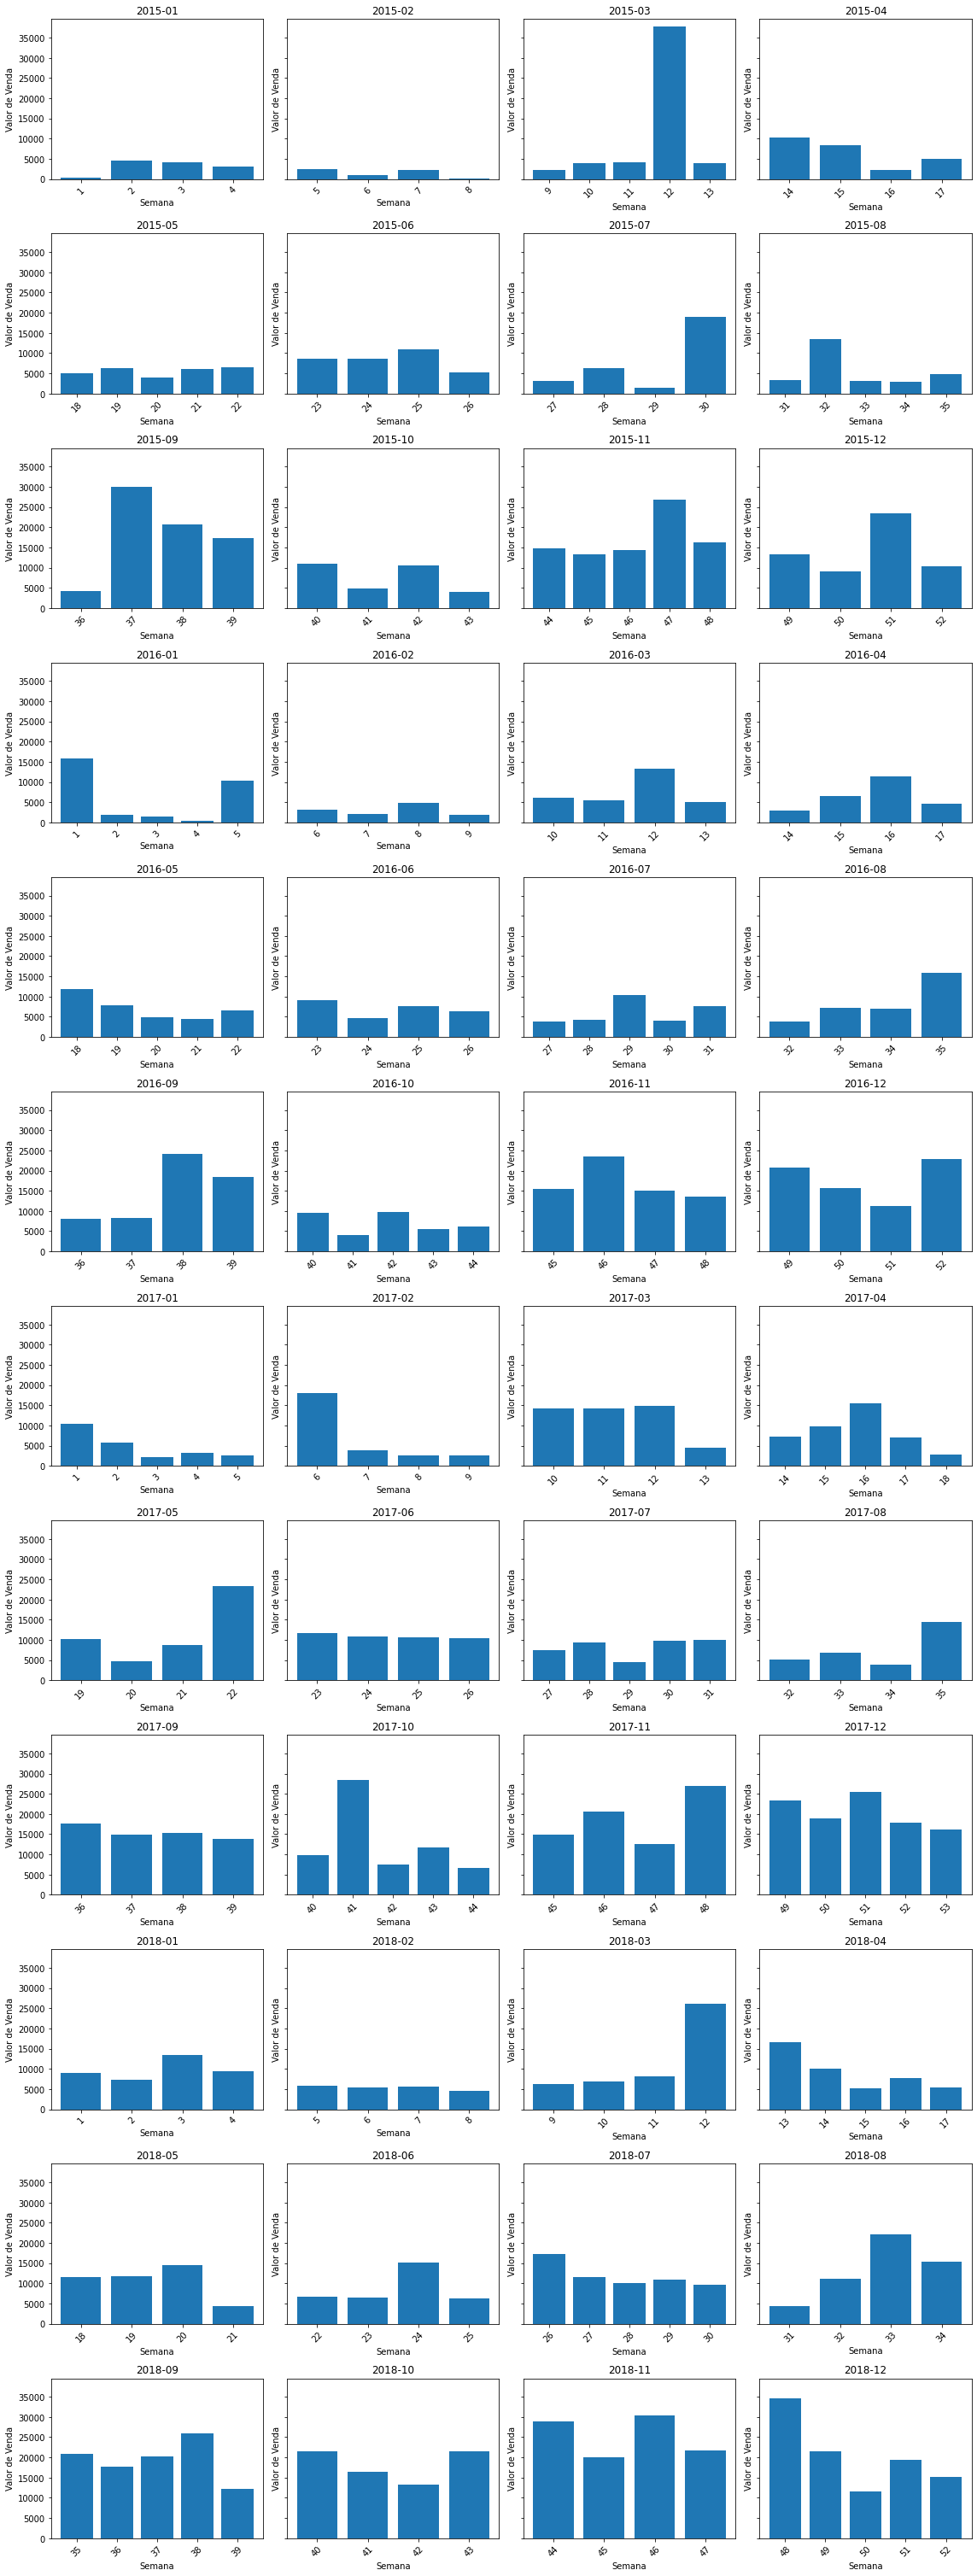

In [39]:
# Plotagem de 'multigráficos' mensais, a partir dos dados semanais agrupados
# Controle dos eixos
fig, axs = plt.subplots(12, 4, figsize=(16, 42), sharey=True)

for i, mes in enumerate(df_weekly['Mes'].unique()):
    linha = i // 4  # Número da linha do subplot
    coluna = i % 4  # Número da coluna do subplot
    
    mes_df = df_weekly[df_weekly['Mes'] == mes]
    semana_min = mes_df['Semana'].min()
    semana_max = mes_df['Semana'].max()
    
    semanas = list(range(semana_min, semana_max + 1))
    vendas = mes_df.groupby('Semana')['Valor_Venda'].sum().reindex(semanas, fill_value=0)
    
    axs[linha, coluna].bar(semanas, vendas)
    axs[linha, coluna].set_title(np.datetime_as_string(mes, unit='M'))
    axs[linha, coluna].set_xlabel('Semana')
    axs[linha, coluna].set_ylabel('Valor de Venda')
    axs[linha, coluna].set_xticks(semanas)
    axs[linha, coluna].tick_params(axis='x', rotation=45)
    
# Ajuste do layout
plt.tight_layout()
plt.show()

In [40]:
# Checando o porquê dos erros dos subplots axis (3,0) e axis (6,0):
df_weekly.iloc[[0, 51, 52, 53, 103, 104, 105, 156, 157]]

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
51,2015-12-27,10335.8080,2015-12-01,52
52,2016-01-03,15880.6606,2016-01-01,1
53,2016-01-10,1973.4440,2016-01-01,2
103,2016-12-25,22843.0470,2016-12-01,52
104,2017-01-01,10421.8172,2017-01-01,1
105,2017-01-08,5769.6080,2017-01-01,2
156,2017-12-31,16060.1850,2017-12-01,53
157,2018-01-07,9060.9840,2018-01-01,1


In [41]:
# Como existe um erro no campo 'Semana' relacionado ao sistema ISO, pode-se gerar o campo de outra forma:
# Usa-se o strftime, com o arg '%U' ao invés do '%W' (que indexa (inicia) as semanas com a base 0)
df_weekly['Semana'] = df_weekly['Data_Pedido'].dt.strftime('%U').astype(int) # Usa-se o %U ao invés do %W
df_weekly

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
1,2015-01-11,4619.1080,2015-01-01,2
2,2015-01-18,4130.5330,2015-01-01,3
3,2015-01-25,3092.5440,2015-01-01,4
4,2015-02-01,2527.9140,2015-02-01,5
...,...,...,...,...
204,2018-12-02,34665.0800,2018-12-01,48
205,2018-12-09,21432.3010,2018-12-01,49
206,2018-12-16,11542.8340,2018-12-01,50
207,2018-12-23,19457.0680,2018-12-01,51


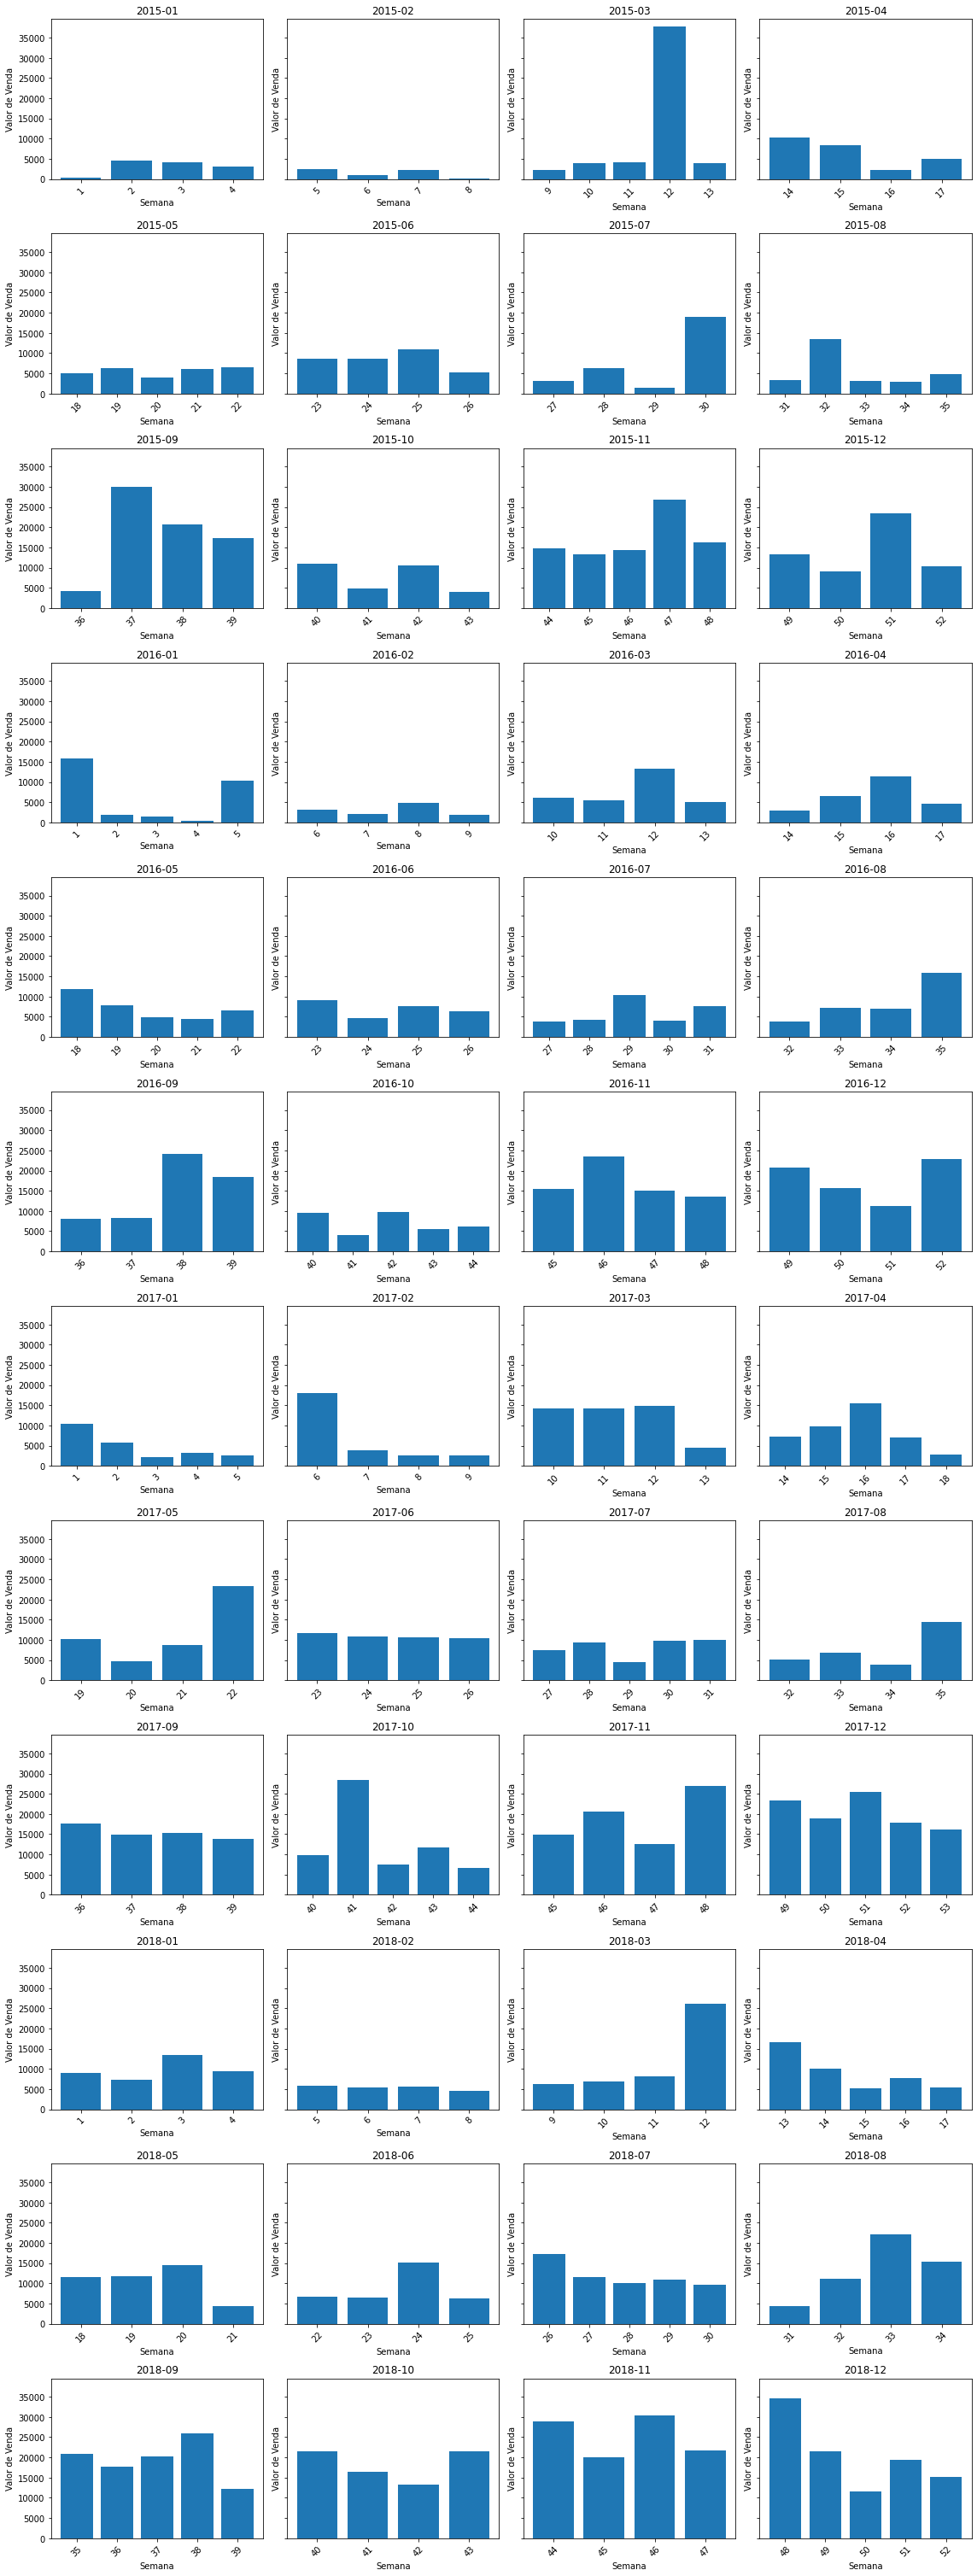

In [42]:
# Plotando novamente, o erro está corrigido.

# Plotagem de 'multigráficos' mensais, a partir dos dados semanais agrupados
# Controle dos eixos
fig, axs = plt.subplots(12, 4, figsize=(16, 42), sharey=True)

for i, mes in enumerate(df_weekly['Mes'].unique()):
    linha = i // 4  # Número da linha do subplot
    coluna = i % 4  # Número da coluna do subplot
    
    mes_df = df_weekly[df_weekly['Mes'] == mes]
    semana_min = mes_df['Semana'].min()
    semana_max = mes_df['Semana'].max()
    
    semanas = list(range(semana_min, semana_max + 1))
    vendas = mes_df.groupby('Semana')['Valor_Venda'].sum().reindex(semanas, fill_value=0)
    
    axs[linha, coluna].bar(semanas, vendas)
    axs[linha, coluna].set_title(np.datetime_as_string(mes, unit='M'))
    axs[linha, coluna].set_xlabel('Semana')
    axs[linha, coluna].set_ylabel('Valor de Venda')
    axs[linha, coluna].set_xticks(semanas)
    axs[linha, coluna].tick_params(axis='x', rotation=45)
    
# Ajuste do layout
plt.tight_layout()
plt.show()

In [43]:
# Pode-se checar novamente se algumas das linhas estão com o número da semana correto:
df_weekly.iloc[[0, 51, 52, 53, 103, 104, 105, 156, 157]]

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
51,2015-12-27,10335.8080,2015-12-01,52
52,2016-01-03,15880.6606,2016-01-01,1
53,2016-01-10,1973.4440,2016-01-01,2
103,2016-12-25,22843.0470,2016-12-01,52
104,2017-01-01,10421.8172,2017-01-01,1
105,2017-01-08,5769.6080,2017-01-01,2
156,2017-12-31,16060.1850,2017-12-01,53
157,2018-01-07,9060.9840,2018-01-01,1


## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [44]:
# Cria-se o DataFrame com os dados necessários e já ordenados para permitir que o gráfico foque na variável-alvo.
df_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_estado

,Valor_Venda
Estado,
California,442927.0975
New York,304536.4010
Texas,163549.8602
Washington,133826.0060
Pennsylvania,114411.6800
Florida,88043.7000
Illinois,78109.9270
Michigan,76081.1740
Ohio,74277.8020


<Axes: xlabel='Estado'>

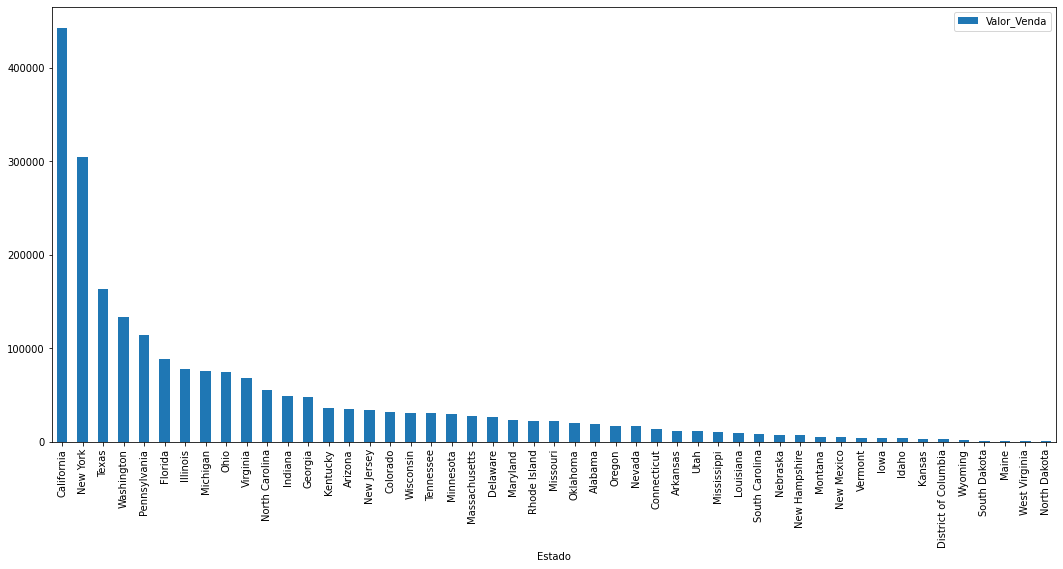

In [45]:
df_estado.plot.bar(figsize=(18,8))

Poderiam ainda ser criados plots mais detalhados, dividindo o Valor de Venda dos Estados por classe, ou priorizando apenas Estados mais relevantes, por exemplo:

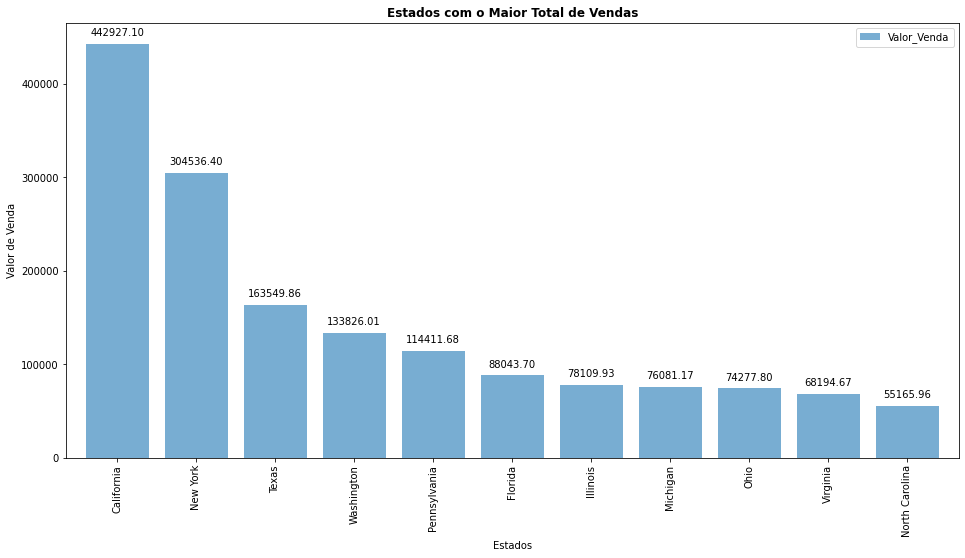

In [46]:
# Utiliza-se o mesmo DataFrame criado anteriormente para plotar um gráfico em maior nível de detalhe.

fig, ax = plt.subplots(figsize=(16, 8))
df_estado[0:11].plot.bar(ax=ax, width=0.8, alpha=0.6)

ax.set_xlabel('Estados')
ax.set_ylabel('Valor de Venda')
ax.set_title('Estados com o Maior Total de Vendas', fontweight='bold')

for p in ax.patches:
    bar_label = '{:.2f}'.format(round(p.get_height(),2))
    ax.annotate(str(bar_label), (p.get_x() + p.get_width() / 2, p.get_height()),\
                xytext=(0, 6), textcoords="offset points",\
                ha='center', va='bottom')
 
    
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [47]:
# Cria-se um filtro no DataFrame com os dados necessários, já ordenando por Valor de Venda (Valor_Venda):
df_cidade = df_dsa.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_cidade

,Valor_Venda
Cidade,
New York City,251749.219
Los Angeles,171654.633
Seattle,114725.478
San Francisco,107489.952
Philadelphia,107197.803
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


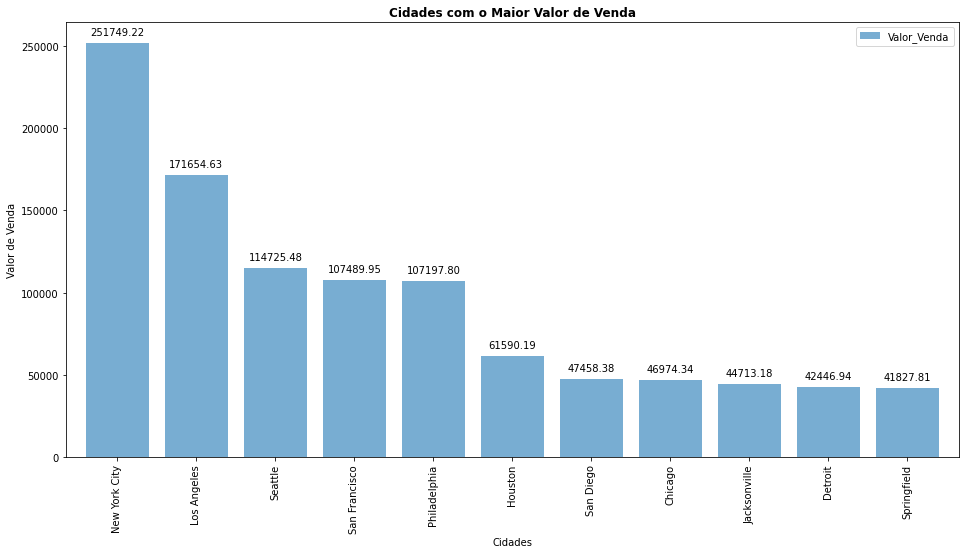

In [48]:
# Utiliza-se o mesmo DataFrame criado anteriormente para plotar um gráfico em maior nível de detalhe.

fig, ax = plt.subplots(figsize=(16, 8))
df_cidade[0:11].plot.bar(ax=ax, width=0.8, alpha=0.6)

ax.set_xlabel('Cidades')
ax.set_ylabel('Valor de Venda')
ax.set_title('Cidades com o Maior Valor de Venda', fontweight='bold')

for p in ax.patches:
    bar_label = '{:.2f}'.format(round(p.get_height(),2))
    ax.annotate(str(bar_label), (p.get_x() + p.get_width() / 2, p.get_height()), \
                xytext=(0, 6), textcoords="offset points",\
                ha='center', va='bottom')
 
    
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [49]:
# Filtrando o dataFrame com as variáveis de interesse
df_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_segmento

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


In [50]:
# O Pie Plot funciona melhor com percentuais. 
# Portanto, pode-se criar um campo com o percentual e plotar o gráfico a partir disso
df_segmento['Percentual'] = df_segmento['Valor_Venda'].apply(lambda x: (x / df_segmento['Valor_Venda'].sum()) * 100)
df_segmento

,Valor_Venda,Percentual
Segmento,,
Consumer,1.133834e+06,50.718181
Corporate,6.792322e+05,30.383117
Home Office,4.224914e+05,18.898702


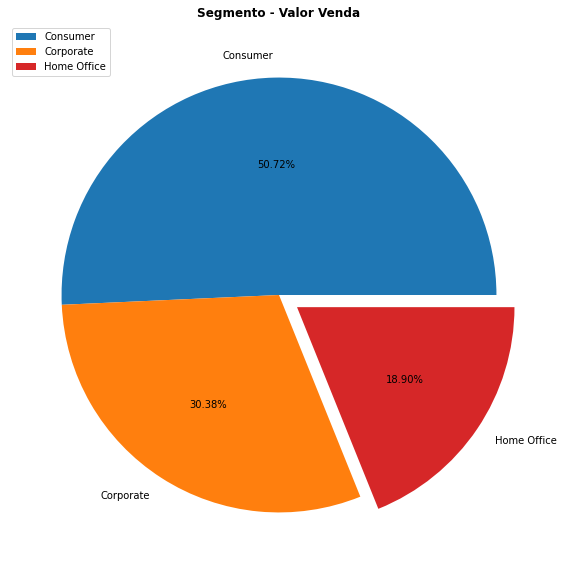

In [51]:
# Como os dados simples, o pie plot também deve ser simples
# Por meio das cores, pode-se enfatizar alguma variável de interesse, por exemplo.
df_segmento['Percentual'].plot.pie(figsize=(10,10), explode=[0,0,0.1], \
                                   colors=['tab:blue','tab:orange','tab:red'], autopct='%.2f%%')

plt.ylabel('')  # Remover o rótulo do eixo y
plt.title('Segmento - Valor Venda', fontweight='bold')
plt.legend(df_segmento.index, loc='upper left')


plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [52]:
# Checando o tipo de dados
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [53]:
# Criando a coluna "Ano" e aplicando filtro e o agrupamento
df_dsa["Ano"] = df_dsa['Data_Pedido'].dt.year
df_dsa[["Segmento","Ano","Valor_Venda"]].groupby(['Segmento', 'Ano']).sum()

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [54]:
# Aplica-se os descontos condicionais com base no 'Valor_Venda' para ter-se os descontos e valores corrigidos:
df_dsa["Descontos"] = df_dsa['Valor_Venda'].apply(lambda x: 0.15 * x if x > 1000 else 0.10 * x)
df_dsa["Valor_Corrigido"] = df_dsa['Valor_Venda'].apply(lambda x: 0.85 * x if x > 1000 else 0.90 * x)
df_dsa.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Descontos,Valor_Corrigido
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,26.19600,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,73.19400,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,1.46200,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,95.75775,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,2.23680,20.13120
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,4.88600,43.97400
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.72800,6.55200
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,90.71520,816.43680
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,1.85040,16.65360
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,11.49000,103.41000


In [55]:
# Calcula-se quantas vendas receberiam 15% de desconto
# aplicando uma máscara booleana [[]] no teste e com o shape contando os valores que satisfazem a condição:
df_dsa[df_dsa['Valor_Venda'] > 1000].shape[0]

457

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim